# <font color=pink> Statistical learning project </font> #

In [31]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl 
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## <font color=cyan> 1. Data analysis </font>

First things first, let's import the data frame.

In [8]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [10]:
print(f"Number of variables: {df.shape[1]}, number of observations: {df.shape[0]}")

Number of variables: 29, number of observations: 19735


In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## <font color=cyan> 2. Train/test split, preprocessing </font>

First of all, let's separate outputs (Y) from features (X).

In [13]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

Now we can split our data into a train set (75% of our data) and a test set (the remaining 15%) using ``train_test_split``.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

Let's then preprocess our input data (standardize then scale our input variables) using ``StandardScaler`` to ensure stability in the models we'll be implementing later on in this project. 

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n, d = X_train.shape

## <font color=cyan> 2. Regression problem </font>

In a general regression framework, $D_n = \left\{(X_i,Y_i)\right\}_{1\le i\le n}$ where the observations $(X_i,Y_i)_{1\le i\le n}$ are iid, $X_i\in\mathbb{R}^d$ and $Y_i\in\mathbb{R}$.
Given a family of functions F, the aim here is to minimize risk empirically, ie to solve the following optimization problem: 
$$
\widehat f_n\in  \mathrm{argmin}_{f\in\ F}\,\left(n^{-1} \sum_{i=1} ^n (f(X_i) - Y_i)^2 \right)\,.
$$

### <font color=darkcyan> 2.1 Linear regression </font>

In a well-specified linear regression setting, we assume that f is a linear function and the model is as follows: 
$$Y = X \theta_{\star} + \varepsilon\,.$$
where :
 - $Y\in\mathbb{R}^n$ is the random vector of observations
 - $X\in\mathbb{R}^{n\times d}$ is the matrix of inputs/features
 - $\varepsilon\ \sim \mathcal{N}(0,\,\sigma_{\star}^{2}I_n)$ where $\sigma_{\star}$ is a known number
 - $\theta_{\star}\in\mathbb{R}^d$ is the unknown vector of coefficients that we're trying to approach.

#### <font color=darkcyan> 2.1.1 Full-rank multivariate regression </font>

Considering we have way more observations than variables, it's fair to operate under the assumption that X is a full-rank matrix at first (meaning $X^\top X$ is invertible). 

The least squares estimate of $\theta_{\star}$ is defined as a solution to

$$
\widehat \theta_n\in  \mathrm{argmin}_{\theta\in\mathbb{R}^d}\,\left( \|Y - X\theta\|_2^2 \right)\,.
$$

In this case,  $\widehat \theta_n = (X^\top X)^{-1}X^\top Y$ 

In [47]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = linreg.predict(X_test)

Text(0.5, 1.0, 'Predictions compared to actual test values')

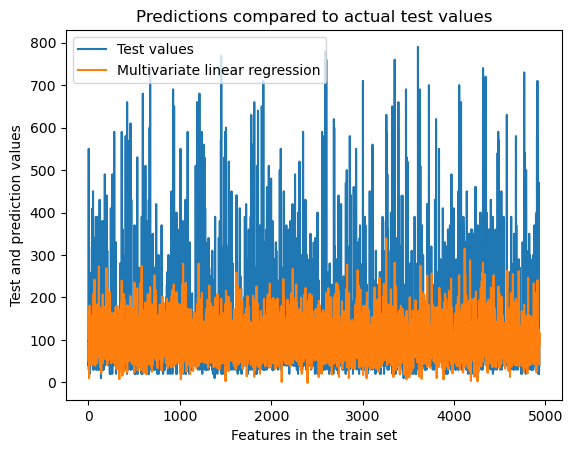

In [49]:
plt.figure()
plt.plot(y_test.values)
plt.plot(y_pred)
plt.xlabel('Features in the train set')
plt.ylabel('Test and prediction values')
plt.legend(labels=('Test values','Multivariate linear regression'))
plt.title('Predictions compared to actual test values')

This graph isn't legible as is, so let's zoom in to get a better idea of what's going on: 

(0.0, 100.0, 0.0, 200.0)

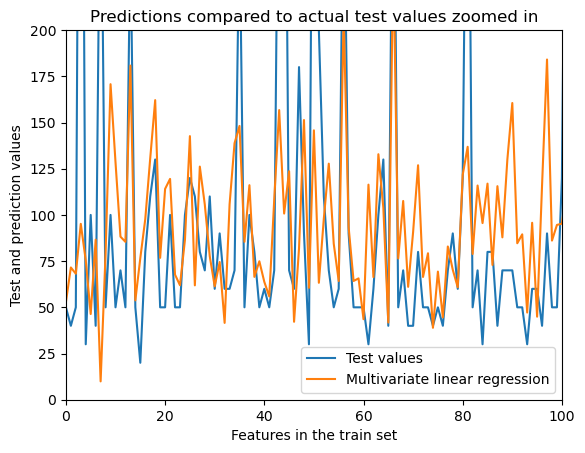

In [50]:
plt.figure()
plt.plot(y_test.values)
plt.plot(y_pred)
plt.xlabel('Features in the train set')
plt.ylabel('Test and prediction values')
plt.legend(labels=('Test values','Multivariate linear regression'))
plt.title('Predictions compared to actual test values zoomed in')
plt.axis([0, 100, 0, 200])

In [51]:
mse = mean_squared_error(y_test, y_pred)
print('MSE =', mse)

MSE = 8882.81407429786


Obviously this isn't working great: there's a variety of reasons for that, including, first and foremost, the fact that the hypothesis we made (that $X^t X$ is invertible) isn't correct and is actually quite restrictive.

#### <font color=darkcyan> 2.1.2 Linear regression with Ridge penalization </font>

In [52]:
np.linalg.det(X_train.T @ X_train)
# X.T @ X is singular

0.0

In this case, however, $X^\top X$ isn't invertible, meaning the least squares estimate isn't robust (and couldn't be computed at all if it weren't for ``scikit-learn``'s use of SVD).

One way of circumventing this issue is to use Ridge regularization, which introduces a hyperparameter $\lambda>0$. The penalized least squares estimate of $\theta_{\star}$ is then defined as:

$$
\widehat \theta_{n,\lambda}^{Ridge}\in  \mathrm{argmin}_{\theta\in\mathbb{R}^d}\,\left( \|Y - X\theta\|_2^2 + \lambda \|\theta\|_2^2\right)
$$

In this case, $n^{-1}X^\top X + \lambda I_n$ is symmetric positive definite, and therefore invertible.


$\widehat \theta_{n,\lambda}^{Ridge} = n^{-1}(n^{-1} X^\top X + \lambda I_n)^{-1}X^\top Y$

In [53]:
p = 50
alphas = np.logspace(-10, 0, p)
mse = []
nb_zeros = []
coefficients = []
for i in range(p):
    ridge = linear_model.Ridge(alphas[i])
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

In [54]:
ridge = linear_model.Ridge(alpha=0.0001)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

8882.814037099743


Let's try and find the best lambda value (ie the one that minimizes the mean squared error) by performing a grid search.

In [58]:
model = linear_model.Ridge()
param_grid={"alpha": np.logspace(-6, 2, num=200)}
gscv = GridSearchCV(model, param_grid)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02])})

In [59]:
print(f'Best parameters = {gscv.best_params_}, MSE = {mse}')
print(f'Best score = {gscv.best_score_}')

Best parameters = {'alpha': 4.297004704320844}, MSE = 8882.814037099743
Best score = 0.16093467415325052
